## Binary Classification using a neural network with Keras
using binary_crossentropy loss in Keras

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adamax
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

In [2]:
import tensorflow
tensorflow.__version__

'2.14.0'

### Load the data

In [3]:
data=np.load('pneumoniamnist.npz')

In [4]:
x_train=data['train_images']
x_val=data['val_images']
x_test=data['test_images']
y_train=data['train_labels']
y_val=data['val_labels']
y_test=data['test_labels']

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0].max()

225.0

In [7]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_val /= 255
x_test /= 255

In [8]:
x_train = x_train.reshape(-1, 784)
x_val = x_val.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
print(x_train.shape[0], 'training samples')
print(x_val.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')

4708 training samples
524 validation samples
624 test samples


In [9]:
y_train = y_train.reshape(-1)
y_val = y_val.reshape(-1)
y_test = y_test.reshape(-1)

### Show the images

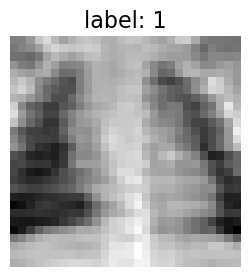

<Figure size 640x480 with 0 Axes>

In [10]:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, x_train.shape[0], 100):
    I = x_train[n,:].reshape(28,28)
    ax.imshow(I, cmap='gray')
    ax.set_title('label: ' + str(int(y_train[n])), fontsize=16)
    ax.axis('off')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(1) 

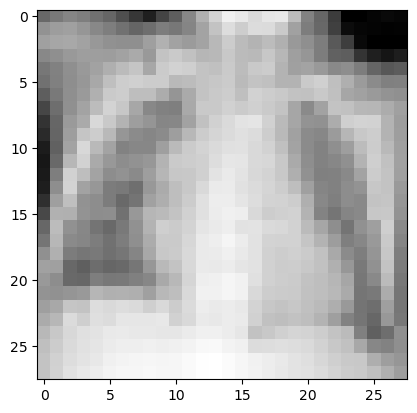

In [11]:
#the first image in the training set
plt.imshow(x_train[0].reshape(28,28), cmap='gray')

In [12]:
#the class label of the first training sample
y_train[0]

1.0

## Try logistiRegression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
LR=LogisticRegression(solver='newton-cg')
LR.fit(x_train, y_train)

C:\Users\liang\.conda\envs\tensorflow\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\liang\.conda\envs\tensorflow\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(solver='newton-cg')

In [15]:
LR.score(x_test, y_test)

0.8461538461538461

### Define the MLP model

In [16]:
model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(784,)))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=1,  activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adamax(learning_rate=0.01),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 267009 (1.02 MB)
Trainable params: 267009 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
loss_train_list=[]
loss_val_list=[]
acc_train_list=[]
acc_val_list=[]

### Train the model
https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model

In [18]:
for epoch in range(0, 100):   
    print('epoch', epoch)
    #set epochs=1
    history=model.fit(x_train, y_train, batch_size=64, epochs=1, validation_data=(x_val, y_val))
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])
    acc_train_list.extend(history.history['accuracy'])
    acc_val_list.extend(history.history['val_accuracy'])
    #save the model to a keras file 
    model.save('NN_binary_classification_Keras_e'+str(epoch)+'.keras')

epoch 0
74/74 [==============================] - 1s 5ms/step - loss: 0.6877 - accuracy: 0.7770 - val_loss: 0.2490 - val_accuracy: 0.8760
epoch 1
74/74 [==============================] - 0s 4ms/step - loss: 0.2087 - accuracy: 0.9127 - val_loss: 0.2693 - val_accuracy: 0.8798
epoch 2
74/74 [==============================] - 0s 3ms/step - loss: 0.1629 - accuracy: 0.9378 - val_loss: 0.4118 - val_accuracy: 0.8435
epoch 3
74/74 [==============================] - 0s 4ms/step - loss: 0.1693 - accuracy: 0.9312 - val_loss: 0.1560 - val_accuracy: 0.9466
epoch 4
74/74 [==============================] - 0s 4ms/step - loss: 0.1419 - accuracy: 0.9424 - val_loss: 0.2030 - val_accuracy: 0.9237
epoch 5
74/74 [==============================] - 0s 4ms/step - loss: 0.1636 - accuracy: 0.9337 - val_loss: 0.1460 - val_accuracy: 0.9523
epoch 6
74/74 [==============================] - 0s 4ms/step - loss: 0.1406 - accuracy: 0.9458 - val_loss: 0.1280 - val_accuracy: 0.9542
epoch 7
74/74 [==========================

74/74 [==============================] - 0s 4ms/step - loss: 0.0987 - accuracy: 0.9607 - val_loss: 0.1098 - val_accuracy: 0.9599
epoch 60
74/74 [==============================] - 0s 3ms/step - loss: 0.0984 - accuracy: 0.9611 - val_loss: 0.1421 - val_accuracy: 0.9370
epoch 61
74/74 [==============================] - 0s 4ms/step - loss: 0.0985 - accuracy: 0.9596 - val_loss: 0.1100 - val_accuracy: 0.9542
epoch 62
74/74 [==============================] - 0s 4ms/step - loss: 0.0922 - accuracy: 0.9622 - val_loss: 0.1167 - val_accuracy: 0.9523
epoch 63
74/74 [==============================] - 0s 4ms/step - loss: 0.1020 - accuracy: 0.9601 - val_loss: 0.1795 - val_accuracy: 0.9275
epoch 64
74/74 [==============================] - 0s 4ms/step - loss: 0.1121 - accuracy: 0.9569 - val_loss: 0.1431 - val_accuracy: 0.9485
epoch 65
74/74 [==============================] - 0s 4ms/step - loss: 0.1000 - accuracy: 0.9592 - val_loss: 0.1618 - val_accuracy: 0.9179
epoch 66
74/74 [===========================

### Plot training histroy: loss vs epoch and accuracy vs epoch

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

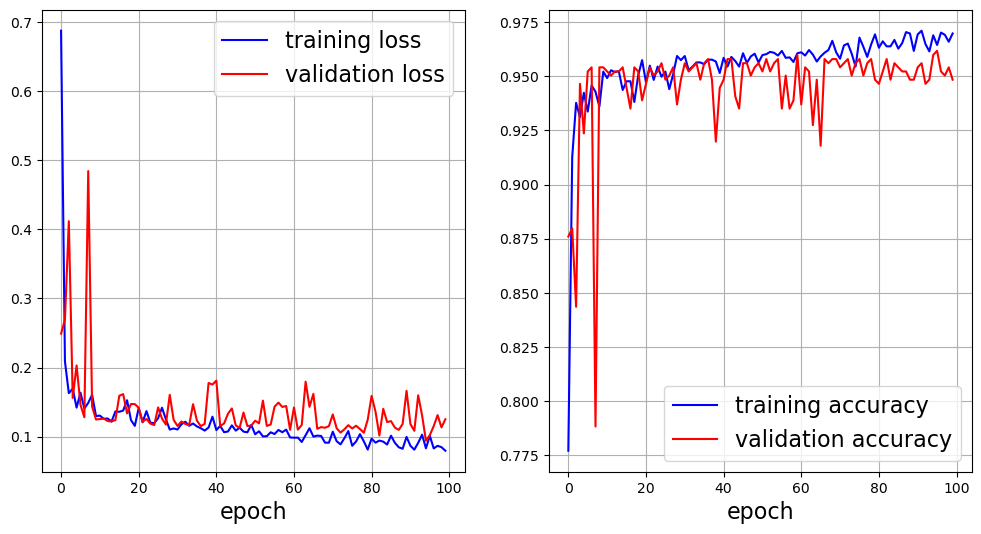

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(np.arange(0,len(loss_train_list)), loss_train_list, '-b', label='training loss')
ax[0].plot(np.arange(0,len(loss_val_list)), loss_val_list, '-r', label='validation loss')
ax[0].set_xlabel('epoch',fontsize=16)
ax[0].legend(fontsize=16)
ax[0].grid(True)
ax[1].plot(np.arange(0,len(acc_train_list)), acc_train_list, '-b', label='training accuracy')
ax[1].plot(np.arange(0,len(acc_val_list)), acc_val_list, '-r', label='validation accuracy')
ax[1].set_xlabel('epoch',fontsize=16)
ax[1].legend(fontsize=16)
ax[1].grid(True)

after training, we load the best model

In [21]:
best_idx= np.argmax(acc_val_list)
best_idx

95

In [23]:
from tensorflow.keras.models import load_model
model = load_model('NN_binary_classification_Keras_e'+str(best_idx)+'.keras')

### Test the model

In [24]:
score = model.evaluate(x_test, y_test, batch_size=64, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.49270814657211304
Test accuracy: 0.8461538553237915


### Make Prediction on the test set

In [25]:
y_test_pred=model.predict(x_test, batch_size=64)

10/10 [==============================] - 0s 1ms/step


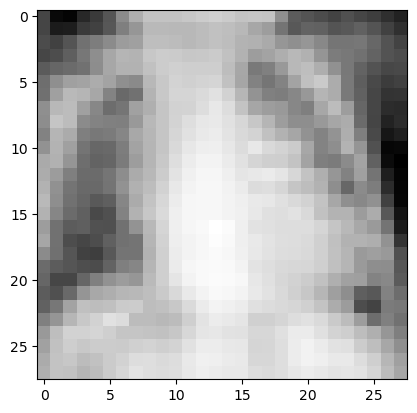

In [26]:
#the first image in the test set
plt.imshow(x_test[0].reshape(28,28), cmap='gray')

In [28]:
#prediction
y_test_pred[0]

array([0.9991143], dtype=float32)

In [27]:
#ground truth
y_test[0]

1.0